In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os, sys 
sys.path.append('..')
import collections
import copy
import itertools
import aoc_utils as au
import math 
from tqdm import tqdm
import matplotlib.pyplot as plt


In [5]:
input_text = au.read_txt_file_lines()
# input_mat = input_text[:8]
# input_dirs = input_text[9:]

In [ ]:
# input_mat = input_text[:50]
# input_dirs = input_text[51:]

input_mat = input_text[:10]
input_dirs = input_text[11:]

print(input_mat)

['##########', '#..O..O.O#', '#......O.#', '#.OO..O.O#', '#..O@..O.#', '#O#..O...#', '#O..O..O.#', '#.OO.O.OO#', '#....O...#', '##########']


In [ ]:
print(input_dirs)

['<vv>^<v^>v>^vv^v>v<>v^v<v<^vv<<<^><<><>>v<vvv<>^v^>^<<<><<v<<<v^vv^v>^', 'vvv<<^>^v^^><<>>><>^<<><^vv^^<>vvv<>><^^v>^>vv<>v<<<<v<^v>^<^^>>>^<v<v', '><>vv>v^v^<>><>>>><^^>vv>v<^^^>>v^v^<^^>v^^>v^<^v>v<>>v^v^<v>v^^<^^vv<', '<<v<^>>^^^^>>>v^<>vvv^><v<<<>^^^vv^<vvv>^>v<^^^^v<>^>vvvv><>>v^<<^^^^^', '^><^><>>><>^^<<^^v>>><^<v>^<vv>>v>>>^v><>^v><<<<v>>v<v<v>vvv>^<><<>^><', '^>><>^v<><^vvv<^^<><v<<<<<><^v<<<><<<^^<v<^^^><^>>^<v^><<<^>>^v<v^v<v^', '>^>>^v>vv>^<<^v<>><<><<v<<v><>v<^vv<<<>^^v^>^^>>><<^v>>v^v><^^>>^<>vv^', '<><^^>^^^<><vvvvv^v<v<<>^v<v>v<<^><<><<><<<^^<<<^<<>><<><^^^>^^<>^>v<>', '^^>vv<^v^v<vv>^<><v<^v>^^^>>>^^vvv^>vvv<>>>^<^>>>>>^<<^v>^vvv<>^<><<v>', 'v^^>>><<^^<>>^v^<v^vv<>v^<<>^<^v^v><^<<<><<^<v><v<>vv>>v><v^<vv<>v^<<^']


In [ ]:
dirs = ''.join(input_dirs)

n_rows = len(input_mat)
n_cols = len(input_mat[0])
for ii in range(1, n_rows):
    assert len(input_mat[ii]) == n_cols, f'row {ii} has {len(input_mat[ii])} cols, not {n_cols}'
print(f'input map has {n_rows} rows and {n_cols} cols')

input map has 10 rows and 10 cols


In [ ]:
# mat = copy.deepcopy(input_mat)
mapping_els = {'.': 0, 'O': 1, '@': 2, '#': 3}
mat = np.zeros((n_rows, n_cols), dtype=int)
for ir in range(n_rows):
    for ic in range(n_cols):
        mat[ir, ic] = mapping_els[input_mat[ir][ic]]

start_ir, start_ic = np.where(mat == 2)
start_ir, start_ic = start_ir[0], start_ic[0]
print(start_ir, start_ic)
ir, ic = start_ir, start_ic

map_dirs = {'>': (0, 1), '<': (0, -1), 'v': (1, 0), '^': (-1, 0)}
# print(mat)
for str_d in dirs:
    
    d = map_dirs[str_d]
    # print(str_d, d)
    start_ir, start_ic = copy.deepcopy(ir), copy.deepcopy(ic)

    if mat[ir + d[0], ic + d[1]] == 0:
        # print('step')
        mat[ir + d[0], ic + d[1]] = 2
        mat[ir, ic] = 0
        ir += d[0]
        ic += d[1]
        # print(mat)
        continue 

    while mat[ir + d[0], ic + d[1]] == 1:
        # print('box')
        ir += d[0]
        ic += d[1]

    if mat[ir + d[0], ic + d[1]] == 3:
        # print('wall')
        ir, ic = start_ir, start_ic
        continue 
    else:
        # print('post box step')
        mat[ir + d[0], ic + d[1]] = 1
        mat[start_ir + d[0], start_ic + d[1]] = 2
        mat[start_ir, start_ic] = 0
        ir = start_ir + d[0]
        ic = start_ic + d[1]
        # print(mat)
        continue 




4 4


In [11]:
total = 0
for ir in range(n_rows):
    for ic in range(n_cols):
        if mat[ir, ic] == 1:
            total += ir * 100
            total += ic

total

0

# part 2

In [20]:
input_text = au.read_txt_file_lines()

# input_mat = input_text[:50]
# input_dirs = input_text[51:]
# input_mat = input_text[:14]
# input_dirs = input_text[15:]
input_mat = input_text[:13]
input_dirs = input_text[14:]

# input_mat = input_text[:10]
# input_dirs = input_text[11:]
dirs = ''.join(input_dirs)

n_rows = len(input_mat)
n_cols = len(input_mat[0])
for ii in range(1, n_rows):
    assert len(input_mat[ii]) == n_cols, f'row {ii} has {len(input_mat[ii])} cols, not {n_cols}'
print(f'input map has {n_rows} rows and {n_cols} cols')

print(input_mat)
print(dirs)

for ir, r in enumerate(input_mat):
    input_mat[ir] = ''.join([x.replace('#', '##').replace('O', '[]').replace('.', '..').replace('@', '@.') for x in r])

print(dirs[:20], '----', dirs[-20:])
input_mat


input map has 13 rows and 10 cols
['##########', '#.O......#', '#....@...#', '#........#', '#........#', '#........#', '#.....O..#', '#........#', '#........#', '#..O.....#', '#........#', '#........#', '##########']
>
> ---- >


['####################',
 '##..[]............##',
 '##........@.......##',
 '##................##',
 '##................##',
 '##................##',
 '##..........[]....##',
 '##................##',
 '##................##',
 '##....[]..........##',
 '##................##',
 '##................##',
 '####################']

3 boxes and 84 walls
finished


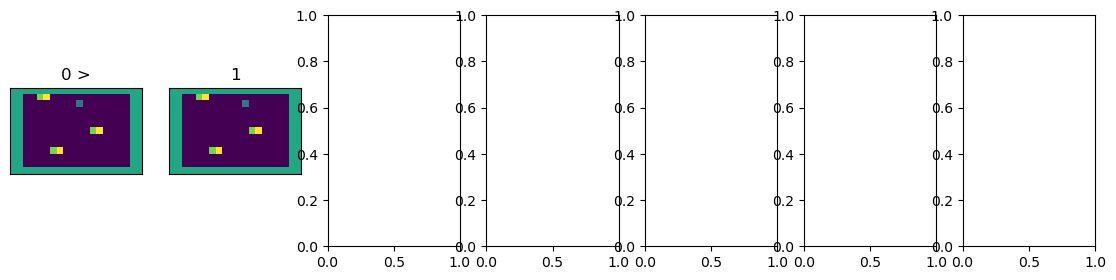

it:  1


1622

In [21]:
plotting = True
verbose = False
# dirs = dirs[:10]

def plot_mat(mat, ax=None, t='', show=True, save=False):
    if ax is None:
        fig, ax = plt.subplots(figsize=(20, 20))
    else:
        fig = ax.figure
    
    im = ax.imshow(mat, interpolation='none')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(t)
    
    if save:
        fig.savefig(f'figs/{t}.png', bbox_inches='tight')
        ax.clear()
    if show:
        plt.show()
    
n_rows = len(input_mat)
n_cols = len(input_mat[0])
mapping_els = {'.': 0, '[': 4, ']': 5, '@': 2, '#': 3}
mat = np.zeros((n_rows, n_cols), dtype=int)
for ir in range(n_rows):
    for ic in range(n_cols):
        mat[ir, ic] = mapping_els[input_mat[ir][ic]]

start_ir, start_ic = np.where(mat == 2)
start_ir, start_ic = start_ir[0], start_ic[0]
ir, ic = start_ir, start_ic

map_dirs = {'>': (0, 1), '<': (0, -1), 'v': (1, 0), '^': (-1, 0)}
if plotting:
    fig, ax = plt.subplots(len(dirs) // 7 + 1, 7, figsize=(14, 3 * (len(dirs) // 7) + 3), gridspec_kw={'hspace': 0.03})
    ax = np.ravel(ax)
    # fig, ax = plt.subplots()
it = 0

sum_boxes = np.sum(mat == 4)
sum_walls = np.sum(mat == 3)

print(f'{sum_boxes} boxes and {sum_walls} walls')
# assert False
for str_d in dirs:
    assert np.sum(mat == 4) == sum_boxes, f'left box wrong: it {it}, L: {np.sum(mat == 4)}, R: {np.sum(mat == 5)}, start: {np.where(mat == 2)}, walls: {np.sum(mat == 3)}'
    assert np.sum(mat == 5) == sum_boxes, f'right box wrong: it {it}, L: {np.sum(mat == 4)}, R: {np.sum(mat == 5)}, start: {np.where(mat == 2)}, walls: {np.sum(mat == 3)}'
    assert np.sum(mat == 3) == sum_walls, f'walls wrong: it {it}, L: {np.sum(mat == 4)}, R: {np.sum(mat == 5)}, start: {np.where(mat == 2)}, walls: {np.sum(mat == 3)}'
    assert np.sum(mat == 2) == 1, f'start wrong: it {it}, L: {np.sum(mat == 4)}, R: {np.sum(mat == 5)}, start: {np.where(mat == 2)}, walls: {np.sum(mat == 3)}'

    if plotting:
        # plot_mat(mat, ax, f'{it} {str_d}', show=False, save=True)
        # ax.clear()
        plot_mat(mat, ax[it], f'{it} {str_d}', show=False)
        # plt.draw()
        # input("Press Enter to continue...")
    it += 1
    d = map_dirs[str_d]
    start_ir, start_ic = copy.deepcopy(ir), copy.deepcopy(ic)
    dict_cols = {}
    hit_wall = False
    tmp_mat_old = copy.deepcopy(mat)

    if mat[ir + d[0], ic + d[1]] == 0:  # direct step possible
        mat[ir + d[0], ic + d[1]] = 2
        mat[ir, ic] = 0
        ir += d[0]
        ic += d[1]
        continue 
    elif mat[ir + d[0], ic + d[1]] == 3:  # wall
        continue 

    if d in [(0, 1), (0, -1)]:  ## if moving horizontally, keep going until end of boxes:
        assert d[1] != 0 and d[0] == 0, d
        ic += d[1]
        while mat[ir, ic] in [4, 5]:
            ic += d[1]
        
    else:  # vertical:
        assert d[1] == 0 and d[0] != 0, d
        dict_cols = {ir: [start_ic]}  # dict of columns that will need moving. start with robot. 
        keep_going = True
        ir += d[0]  # move to next row, which will NOT be .
        dict_cols[ir] = [start_ic]  # item behind robot is a candidate for moving
        assert mat[ir, start_ic] != 0, (ir, start_ic)
        while keep_going:
            next_row_clear = True  # default to true 
            tmp_to_add = []
            for c in dict_cols[ir]:  # check all candidates
                if mat[ir, c] == 4:  # if box hit, row not clear, include right neighbour
                    if c + 1 not in dict_cols[ir]:  
                        tmp_to_add.append(c + 1)  # might mess up loop but not really an issue I think .. 
                    next_row_clear = False
                elif mat[ir, c] == 5:  # box, add left neighbour
                    if c - 1 not in dict_cols[ir]:
                        tmp_to_add.append(c - 1)
                    next_row_clear = False
                elif mat[ir, c] == 3:  # wall 
                    next_row_clear = False
                    hit_wall = True
                    keep_going = False
                    break

            if next_row_clear:  # end of loop
                keep_going = False
            elif not hit_wall:  # 
                for c in list(set(tmp_to_add)):
                    dict_cols[ir].append(c)
                dict_cols[ir + d[0]] = []  # create next set of candidates
                for x in dict_cols[ir]:
                    if mat[ir, x] != 0:  # box/agent behind it that will push
                        dict_cols[ir + d[0]].append(x)
                    elif mat[ir + d[0], x] in [4, 5]:  # nothing behind it, but part of a box: check other half
                        if mat[ir + d[0], x] == 4:
                            ind_neigh = 1
                        else:
                            ind_neigh = -1
                        if mat[ir, x + ind_neigh] in [2, 4, 5] and x + ind_neigh in dict_cols[ir]:  # if moving box/agent behind other half
                            dict_cols[ir + d[0]].append(x)
                            dict_cols[ir + d[0]].append(x + ind_neigh)
                ir += d[0]

        if not hit_wall:  # don't think this matters
            for tmp_r, cols in dict_cols.items():
                if tmp_r == ir:
                    continue
                dict_cols[tmp_r] = [c for c in cols if mat[tmp_r, c] in [2, 4, 5]]
                
    if hit_wall or (mat[ir, ic] == 3):  #if wall hit 
        ir, ic = start_ir, start_ic  # stay still 
        continue 

    else:  # clear point after boxes:
        # assert mat[ir, ic] == 0, (ir, ic, start_ir, start_ic, mat[ir, ic], d)
        if d in [(0, 1), (0, -1)]:  # horizontal
            for tmp_c in range(ic, start_ic, -d[1]):  # end to beginning in reverse
                mat[ir, tmp_c] = mat[ir, tmp_c - d[1]]  # take on previous element
            assert ir == start_ir
            assert tmp_c - d[1] == start_ic

            mat[ir, tmp_c - d[1]] = 0  
            
        else:  # vertical # {'.': 0, '[': 4, ']': 5, '@': 2, '#': 3}
            # tmp_mat_old = copy.deepcopy(mat)
            for tmp_r in dict_cols.keys():
                assert tmp_r in range(start_ir, ir + d[0], d[0]), (tmp_r, start_ir, ir, d[0])
            for tmp_r in range(start_ir, ir + d[0], d[0]):  # loop from start to new row
                for c in dict_cols[tmp_r]:  # loop through cols
                    if tmp_mat_old[tmp_r, c] == 2:  # if robot, move it
                        mat[tmp_r, c] = 0
                        assert tmp_mat_old[tmp_r, c] == 2
                        mat[tmp_r + d[0], c] = 2
                    elif tmp_mat_old[tmp_r, c] in [4, 5]:  # if box, see if it's pushed
                        ## if behind it is a moving box/agent
                        if (tmp_mat_old[tmp_r - d[0], c] == 2) or (tmp_mat_old[tmp_r - d[0], c] in [4, 5] and tmp_r - d[0] in dict_cols.keys() and c in dict_cols[tmp_r - d[0]]):
                            mat[tmp_r + d[0], c] = tmp_mat_old[tmp_r, c]
                        else:  # see if a moving box/agent is behind the other half
                            assert tmp_mat_old[tmp_r, c] in [4, 5], tmp_mat_old[tmp_r, c]
                            # assert tmp_mat_old[tmp_r - d[0], c] == 0, (tmp_mat_old[:, c], tmp_r, d[0])
                            # assert tmp_mat_old[tmp_r + d[0], c] == 0
                            if tmp_mat_old[tmp_r, c] == 4:
                                neighbour, n_el = 1, 5
                            else:
                                neighbour, n_el = -1, 4
                            assert tmp_mat_old[tmp_r, c + neighbour] == n_el, tmp_mat_old[tmp_r, c + neighbour]
                            # if tmp_mat_old[tmp_r - d[0], c + neighbour] in [2, 4, 5]:
                            if (tmp_mat_old[tmp_r - d[0], c + neighbour] == 2) or (tmp_mat_old[tmp_r - d[0], c + neighbour] in [4, 5] and tmp_r - d[0] in dict_cols.keys() and c + neighbour in dict_cols[tmp_r - d[0]]):
                                mat[tmp_r + d[0], c] = tmp_mat_old[tmp_r, c]
                                mat[tmp_r, c] = 0
                    elif tmp_mat_old[tmp_r, c] == 3:
                        assert False

        ir = start_ir + d[0]  # move
        ic = start_ic + d[1]

print('finished')
if plotting:
    plot_mat(mat, ax[it], it)

print('it: ', it)
total = 0
for ir in range(n_rows):
    for ic in range(n_cols):
        if mat[ir, ic] == 4:
            total += ir * 100
            total += ic

total

In [24]:
assert mat.shape == (n_rows, n_cols)
total = 0
for ir in range(n_rows):
    for ic in range(n_cols):
        if mat[ir, ic] == 4:
            print(ir, ic, ir * 100 + ic)
            total += ir * 100
            total += ic

total

1 4 104
6 12 612
9 6 906


1622

In [70]:
print(tmp_r, cols, d, ir, ic, start_ir, start_ic)
print(dict_cols)
mat[33:44, 42:50]

42 [45, 44] (1, 0) 42 47 35 47
{35: [47], 36: [47, 46], 37: [47, 46, 48, 45], 38: [47, 46, 48, 45, 49, 44], 39: [45, 44], 40: [45, 44], 41: [45, 44], 42: [45, 44]}


array([[0, 4, 5, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [4, 5, 0, 0, 0, 2, 0, 0],
       [3, 3, 0, 0, 4, 5, 0, 0],
       [4, 5, 0, 4, 5, 4, 5, 0],
       [4, 5, 4, 5, 4, 5, 4, 5],
       [4, 5, 4, 5, 0, 0, 0, 0],
       [4, 5, 4, 5, 0, 0, 0, 0],
       [4, 5, 4, 5, 0, 0, 4, 5],
       [0, 0, 0, 0, 4, 5, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
1516806
1501209